ORIE 4580:  Variance Reduction Techniques
=====

Sid Banerjee, Cornell

Notebook demonstrating techniques for variance reduction in simulations

In [2]:
# Preamble to make sure we have all packages we need

import numpy as np
import scipy as sc

# Defining epsilon 
eps = 1e-6
    
# Configuring matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

np.random.seed(110)

## The Effect of the Proposal Distribution on Variance

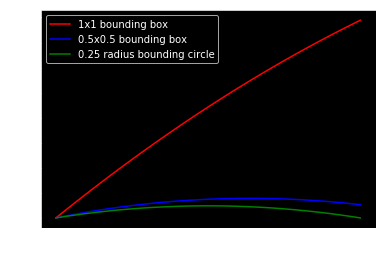

In [3]:
x = np.linspace(0,np.pi/16.0,100)

# Variance of first estimator
plt.plot(x,x*(1-x),'r',label='1x1 bounding box')

# Variance of second estimator
plt.plot(x,x*(1-4.0*x)/4.0,'b',label='0.5x0.5 bounding box')

# Variance of third estimator
plt.plot(x,np.pi*x*(1-16.0*x/np.pi)/16.0,'g',label='0.25 radius bounding circle')

plt.legend(loc=2)
plt.show()

## Variance reduction via Antithetic Variates

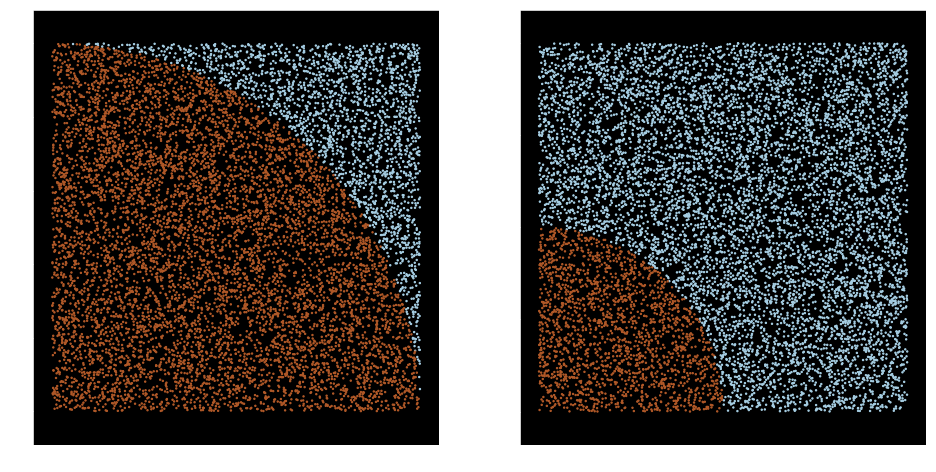

In [4]:
#number of samples
N_total = 10000

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 2, 1)
X = np.random.uniform(low=0, high=1, size=(2,N_total))  
is_point_inside = (np.sqrt(X[0]**2+X[1]**2)<1.0)
plt.scatter(X[0],X[1], c = is_point_inside, s = 2.0, cmap=plt.cm.Paired)  
plt.axis('equal')

ax = fig.add_subplot(1, 2, 2)
Y = np.random.uniform(low=0, high=2, size=(2,N_total))   
is_point_inside = (np.sqrt(Y[0]**2+Y[1]**2)<1.0)
plt.scatter(Y[0],Y[1], c = is_point_inside, s = 2.0, cmap=plt.cm.Paired)  
plt.axis('equal')

plt.show()

Estimate using 1x1 bounding box =  3.14301987194
Estimate using 2x2 bounding box =  3.14813406283


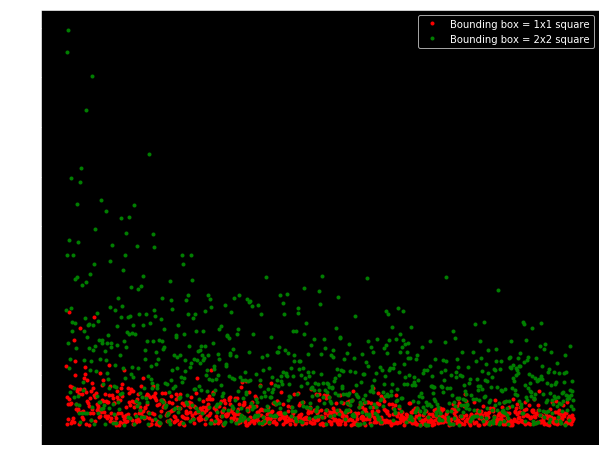

In [5]:
N_min = 50
N_max = 1000

N_array = np.arange(N_min,N_max,1)
estimate_1 = []; estimate_2 = []

np.random.seed(0)

for N in N_array:
    X_1 = np.random.uniform(low=0, high=1, size=(2,N))  
    X_2 = np.random.uniform(low=0, high=2, size=(2,N))  
    N_inside_1=np.sum(np.sqrt(X_1[0]**2+X_1[1]**2)<1.0)
    estimate_1.append(1.0*np.sum(N_inside_1)/N)
    N_inside_2=np.sum(np.sqrt(X_2[0]**2+X_2[1]**2)<1.0)
    estimate_2.append(4.0*np.sum(N_inside_2)/N)


print("Estimate using 1x1 bounding box = ",4*np.mean(estimate_1))    
print("Estimate using 2x2 bounding box = ",4*np.mean(estimate_2))    
    
est_err_0 = np.abs(4*np.array(estimate_1) - np.pi)    
est_err_1 = np.abs(4*np.array(estimate_2) - np.pi)    
    
fig = plt.figure(figsize=(10,8))

plt.plot(N_array,est_err_0,'r.',label="Bounding box = 1x1 square")  
plt.plot(N_array,est_err_1,'g.',label="Bounding box = 2x2 square")  
plt.legend(loc=1)
plt.show()

Estimate using 2x2 bounding box =  3.14273590251
Estimate using 2x2 bounding box =  3.14521089542
Estimate using 2x2 bounding box =  3.14397339896
Estimate using 2x2 bounding box with 2 antithetic variates =  3.14397339896


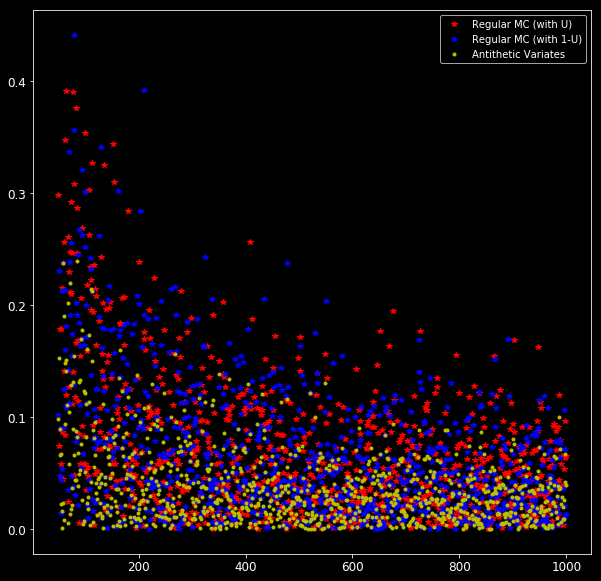

In [22]:
N_min = 50
N_max = 1000

N_array = np.arange(N_min,N_max,1)
estimate_1 = []; estimate_2 = []; estimate_3 = []

np.random.seed(0)
    
for N in N_array:
    X_1 = np.random.uniform(low=0, high=1, size=(2,N))  
    Y_1 = 1.0*np.array((X_1[0]**2+X_1[1]**2<1.0))
    Y_2 = 1.0*np.array(((1.0-X_1[0])**2+(1.0-X_1[1])**2<1.0))

    N_inside_1=np.sum(Y_1)
    N_inside_2=np.sum(Y_2)
    N_inside_3=np.sum((Y_1+Y_2)/2.0)
    
    estimate_1.append(1.0*np.sum(N_inside_1)/N)
    estimate_2.append(1.0*np.sum(N_inside_2)/N)
    estimate_3.append(1.0*np.sum(N_inside_3)/N)


print("Estimate using 2x2 bounding box = ",4*np.mean(estimate_1))    
print("Estimate using 2x2 bounding box = ",4*np.mean(estimate_2))    
print("Estimate using 2x2 bounding box = ",4*np.mean(estimate_3))    
print("Estimate using 2x2 bounding box with 2 antithetic variates = ",4*np.mean(estimate_3))    
est_err_1 = np.abs(4.0*np.array(estimate_1) - np.pi)    
est_err_2 = np.abs(4.0*np.array(estimate_2) - np.pi)    
est_err_3 = np.abs(4.0*np.array(estimate_3) - np.pi)    


plt.plot(N_array,est_err_1,'r*',label="Regular MC (with U)")  
plt.plot(N_array,est_err_2,'b*',label="Regular MC (with 1-U)")  
plt.plot(N_array,est_err_3,'y.',label="Antithetic Variates")  
plt.legend(loc=1)
plt.show()

Estimate using 2x2 bounding box =  3.13762502865
Estimate using 2x2 bounding box with 2 antithetic variates =  3.13681821011
Estimate using 2x2 bounding box with 4 antithetic variates =  3.13681821011


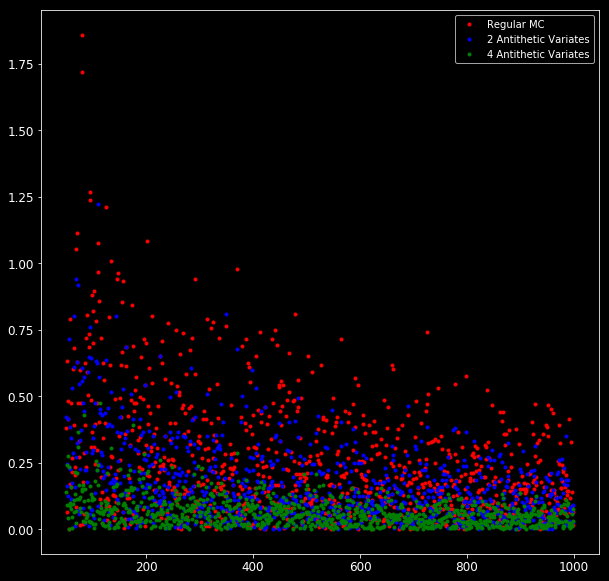

In [23]:
N_min = 50
N_max = 1000

N_array = np.arange(N_min,N_max,1)
estimate_1 = []; estimate_2 = []; estimate_3 = []

np.random.seed(0)
    
for N in N_array:
    X_1 = np.random.uniform(low=0, high=2, size=(2,N))  
    Y_1 = 1.0*np.array(np.sqrt(X_1[0]**2+X_1[1]**2)<1.0)
    Y_2 = 1.0*np.array(np.sqrt((2-X_1[0])**2+(2-X_1[1])**2)<1.0)
    Y_3 = 1.0*np.array(np.sqrt((2-X_1[0])**2+(X_1[1])**2)<1.0)
    Y_4 = 1.0*np.array(np.sqrt((X_1[0])**2+(2-X_1[1])**2)<1.0)
    N_inside_1=np.sum(Y_1)
    N_inside_2=np.sum((Y_1+Y_2)/2.0)
    N_inside_3=np.sum((Y_1+Y_2+Y_3+Y_4)/4.0)

    estimate_1.append(4.0*np.sum(N_inside_1)/N)
    estimate_2.append(4.0*np.sum(N_inside_2)/N)
    estimate_3.append(4.0*np.sum(N_inside_3)/N)

print("Estimate using 2x2 bounding box = ",4*np.mean(estimate_1))    
print("Estimate using 2x2 bounding box with 2 antithetic variates = ",4*np.mean(estimate_2))    
print("Estimate using 2x2 bounding box with 4 antithetic variates = ",4*np.mean(estimate_2))    

est_err_1 = np.abs(4.0*np.array(estimate_1) - np.pi)    
est_err_2 = np.abs(4.0*np.array(estimate_2) - np.pi)    
est_err_3 = np.abs(4.0*np.array(estimate_3) - np.pi)    
    
plt.plot(N_array,est_err_1,'r.',label="Regular MC")  
plt.plot(N_array,est_err_2,'b.',label="2 Antithetic Variates")  
plt.plot(N_array,est_err_3,'g.',label="4 Antithetic Variates")  
plt.legend(loc=1)
plt.show()

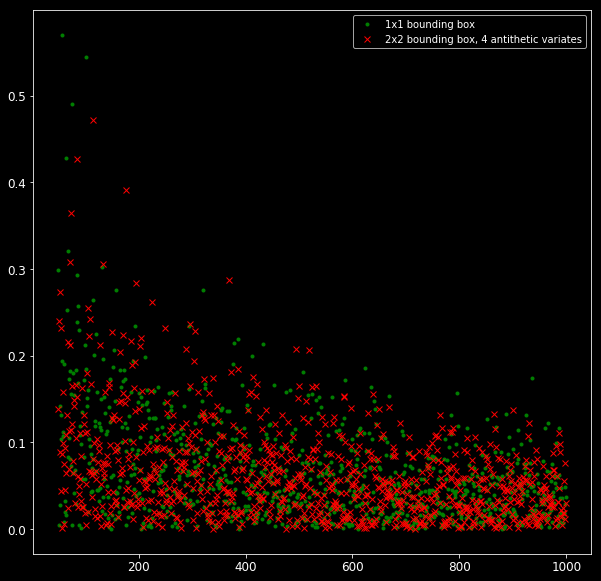

In [26]:
plt.plot(N_array,est_err_0,'g.',label="1x1 bounding box")  
plt.plot(N_array,est_err_3,'rx',label="2x2 bounding box, 4 antithetic variates")  
plt.legend(loc=1)
plt.show()